# NOTEBOOK FOR PROMPT GENERATION FOR INFERENCE (MORE SAMPLES)

This notebook generates prompts for only one task that it is inference:
- **Multiclass classification**: to identify the specific type of attack.

## 1. OBJECTIVES

The main objective of this notebook is to generate high-quality prompts for evaluating large language models (LLMs) in the context of IoT threat detection WITH MORE SAMPLES.

Specifically, it focuses on:
- **Multiclass classification prompts**: to classify the detected malicious traffic into specific attack types.

These prompts will be used as input-output pairs for evaluate the fine-tuning LLMs in downstream classification tasks.

## 2. IMPORTS AND SETUP
Import the required python libraries, for the prompts generation.

In [18]:
# pandas and os imports
import pandas as pd
import os
# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
# sklearn imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## 3. DATA PREPARATION
Load the EdgeIIoT dataset.

In [19]:
# Read dataset
csv_path = "../../data/dataset-csv/DNN-EdgeIIoT-dataset.csv"
df = pd.read_csv(csv_path,low_memory=False)
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.file_data,http.content_length,http.request.uri.query,http.request.method,http.referer,http.request.full_uri,http.request.version,http.response,http.tls_port,tcp.ack,tcp.ack_raw,tcp.checksum,tcp.connection.fin,tcp.connection.rst,tcp.connection.syn,tcp.connection.synack,tcp.dstport,tcp.flags,tcp.flags.ack,tcp.len,tcp.options,tcp.payload,tcp.seq,tcp.srcport,udp.port,udp.stream,udp.time_delta,dns.qry.name,dns.qry.name.len,dns.qry.qu,dns.qry.type,dns.retransmission,dns.retransmit_request,dns.retransmit_request_in,mqtt.conack.flags,mqtt.conflag.cleansess,mqtt.conflags,mqtt.hdrflags,mqtt.len,mqtt.msg_decoded_as,mqtt.msg,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.153346e+09,47892.0,0.0,0.0,0.0,1.0,64855.0,18.0,1.0,0.0,020405b40101040201030307,0,0.0,1883.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.447945e+08,16077.0,0.0,0.0,0.0,0.0,1883.0,24.0,1.0,14.0,0,100c00044d5154540402003c0000,1.0,64855.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,2.0,16.0,12.0,0.0,0,1.0,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,3.153346e+09,62675.0,0.0,0.0,0.0,0.0,64855.0,16.0,1.0,0.0,0,0,1.0,1883.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,3.153346e+09,54469.0,0.0,0.0,0.0,0.0,64855.0,24.0,1.0,4.0,0,20020000,1.0,1883.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0x00000000,0.0,0.0,32.0,2.0,0.0,0,2.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.447945e+08,53812.0,0.0,0.0,0.0,0.0,1883.0,24.0,1.0,41.0,0,3027001854656d70657261747572655f616e645f48756d...,15.0,64855.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,48.0,39.0,0.0,32342e36382037362e34320d0a,3.0,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal


In [20]:
# View columns
print(df.columns)

Index(['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum',
       'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused',
       'http.file_data', 'http.content_length', 'http.request.uri.query',
       'http.request.method', 'http.referer', 'http.request.full_uri',
       'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack',
       'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options',
       'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu',
       'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len

In [21]:
# Save a backup of the dataframe
df_bp = df

## 4. DATA ANALYSIS
Analyze the dataset to preprocess it. 

In [22]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [23]:
# View if there is any missing data
df.isna().sum()

frame.time                   0
ip.src_host                  0
ip.dst_host                  0
arp.dst.proto_ipv4           0
arp.opcode                   0
arp.hw.size                  0
arp.src.proto_ipv4           0
icmp.checksum                0
icmp.seq_le                  0
icmp.transmit_timestamp      0
icmp.unused                  0
http.file_data               0
http.content_length          0
http.request.uri.query       0
http.request.method          0
http.referer                 0
http.request.full_uri        0
http.request.version         0
http.response                0
http.tls_port                0
tcp.ack                      0
tcp.ack_raw                  0
tcp.checksum                 0
tcp.connection.fin           0
tcp.connection.rst           0
tcp.connection.syn           0
tcp.connection.synack        0
tcp.dstport                  0
tcp.flags                    0
tcp.flags.ack                0
tcp.len                      0
tcp.options                  0
tcp.payl

## 5. FEATURE SELECTION AND PREPROCESSING
Select the most important features using a random forest classifier to select the best 7 features.

dns.qry.name.len     0.205840
mqtt.protoname       0.138802
mqtt.msg             0.109687
mqtt.topic           0.101408
mqtt.conack.flags    0.095618
tcp.options          0.081726
tcp.dstport          0.055727
dtype: float64


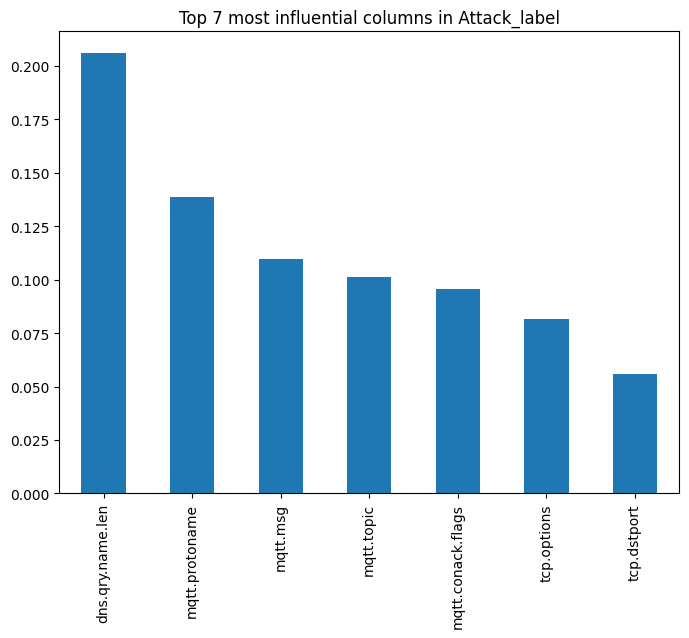

In [24]:
# Convert Attack_label to an integer (0 or 1)
df["Attack_label"] = df["Attack_label"].astype(int)

# Remove unnecessary columns
df = df.drop(["frame.time", "Attack_type"], axis=1, errors="ignore")

# Convert categorical variables into numerical values
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Separate features and target variable
X = df.drop(columns=["Attack_label"])
y = df["Attack_label"]

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display the top 7 most influential features
print(feature_importance.head(7))

# Plot feature importance
plt.figure(figsize=(8,6))
feature_importance.head(7).plot(kind="bar")
plt.title("Top 7 most influential columns in Attack_label")
plt.show()

In [25]:
# Define the selected columns
selected_columns = [
    "dns.qry.name.len", "mqtt.protoname", "mqtt.msg", "mqtt.topic", "mqtt.conack.flags",
    "tcp.options", "tcp.dstport"
]

## 6. CREATE MULTICLASS PROMPTS FOR THE DATASET WITH MORE SAMPLES

This section generates multiclass classification prompts **with more samples balanced** using the 7 previously selected features.  
The prompts will be saved in a JSON file and used for evaluate the fine-tuning LLMs to identify the specific type of attack present in each input sample.


In [31]:
# Create a new DataFrame with the selected columns and the target variable for multiclass classification 
df_selected_multiclass = df_bp[selected_columns + ["Attack_type"]]

In [39]:
# Define number of samples per class
samples_per_class = 1400

# Check if "Attack_type" exists in df_selected
if "Attack_type" not in df_selected_multiclass.columns:
    raise ValueError("Column 'Attack_type' not found in df_selected_multiclass. Check your DataFrame.")

# Select 1000 samples for "Normal" traffic
normal_samples = df_selected_multiclass[df_selected_multiclass["Attack_type"] == "Normal"].sample(
    n=min(samples_per_class, len(df_selected_multiclass[df_selected_multiclass["Attack_type"] == "Normal"])),
    random_state=123
)

# Select 1000 samples for each attack type
attack_samples = df_selected_multiclass[df_selected_multiclass["Attack_type"] != "Normal"].groupby("Attack_type").apply(
    lambda x: x.sample(n=min(samples_per_class, len(x)), random_state=123)
).reset_index(drop=True)

# Combine normal and attack samples into a balanced dataset
df_balanced = pd.concat([normal_samples, attack_samples])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=123).reset_index(drop=True)

/tmp/ipykernel_2677/2628149244.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  attack_samples = df_selected_multiclass[df_selected_multiclass["Attack_type"] != "Normal"].groupby("Attack_type").apply(


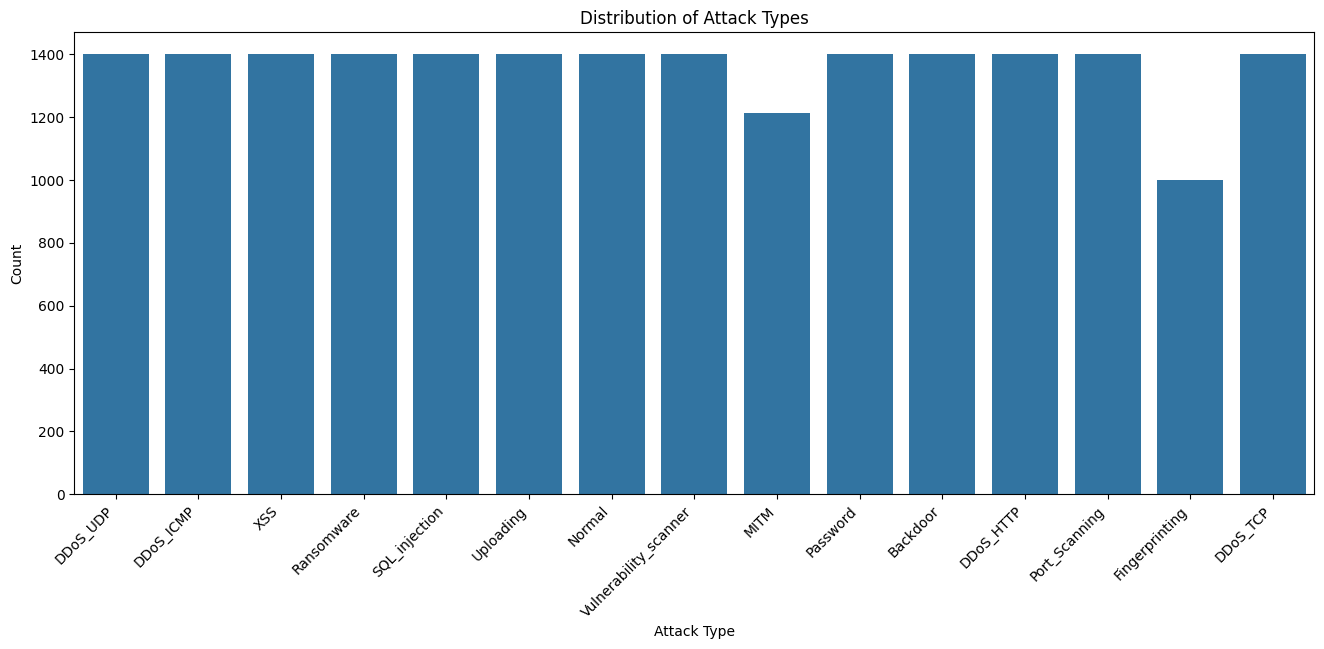

In [40]:
# Count occurrences of each class
# Set a wider figure size
plt.figure(figsize=(16, 6))

# Count occurrences of each attack type
sns.countplot(x=df_balanced["Attack_type"])
plt.title("Distribution of Attack Types")
plt.xlabel("Attack Type")
plt.ylabel("Count")

# Rotate x-axis labels by 45 degrees to prevent overlap
plt.xticks(rotation=45, ha="right")  # ha="right" aligns labels better

# Show the plot
plt.show()

### Generate multiclass prompts

In [ ]:
# Define the directory and filename
save_dir = "../../data/prompts/"
save_filename = "multiclass_instructions_for_inference_more_samples.jsonl"
save_path = os.path.join(save_dir, save_filename)

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

# Define the prompt format for multi-class classification
prompt_style = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request. Before answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.
### Instruction:
You are a cybersecurity expert specializing in IoT security. Your task is to analyze network logs and determine whether the given log data indicates a potential attack. Only provide the type of attack if it is an attack. If the log data is normal traffic, state that it is normal traffic.
### Question:
{}
### Response:
<think>
{}
</think>"""

# Column descriptions for multi-class classification used in the prompt
column_descriptions = {
    "dns.qry.name.len": "The length of the DNS query is:",
    "mqtt.protoname": "The MQTT protocol name used is:",
    "mqtt.msg": "The MQTT message type is:",
    "mqtt.topic": "The MQTT topic is:",
    "mqtt.conack.flags": "The MQTT connection acknowledgment flags are:",
    "tcp.options": "TCP options set in the packet are:",
    "tcp.dstport": "TCP destination port is:"
}

# Ensure df_balanced exists
if 'df_balanced' not in locals():
    raise ValueError("The dataset 'df_balanced' is not defined. Make sure to create it before running this script.")

# Function to create structured prompts for attack classification
def create_prompt(features, label):
    log_details = "\n".join([f"- {column_descriptions.get(col, col)} {features[col]}" for col in features.index])
    
    # Assign attack type correctly
    if label.lower() == "normal":
        label_text = "This log data is normal traffic."
    else:
        label_text = f"This log data is an attack!! The type of attack detected is {label}."

    return prompt_style.format(log_details, label_text)

# Generate structured prompts for each log entry
df_balanced["Prompt"] = df_balanced.apply(lambda row: create_prompt(row.drop("Attack_type"), row["Attack_type"]), axis=1)

# Save dataset in JSONL format
df_balanced[["Prompt"]].to_json(save_path, orient="records", lines=True, force_ascii=False)